## Consumer Trends in Market

This project checks how price of stock is affected by google search trends.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

## Data

In [70]:
# We would like all available data from 2015-01-01 until 2020-12-31.
start_date = '2015-01-01'
end_date = '2020-12-31'

# User pandas_reader.data.DataReader to load the desired data from Yahoo.
tsla = pdr.data.DataReader('TSLA', 'yahoo', start_date, end_date)
ual = pdr.data.DataReader('UAL', 'yahoo', start_date, end_date)
tsla_close = tsla["Close"]
ual_close = ual["Close"]

In [71]:
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001


Text(0.5, 1.0, 'Tesla Stock Price')

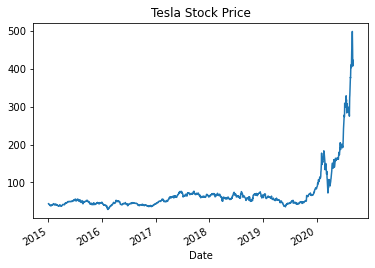

In [72]:
tsla_close.plot()

plt.title("Tesla Stock Price")

In [73]:
ual.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,68.080002,65.709999,67.739998,66.339996,6215000,66.339996
2015-01-05,67.349998,65.500000,66.870003,66.150002,5033400,66.150002
2015-01-06,67.000000,63.110001,66.629997,64.580002,6051700,64.580002
2015-01-07,66.110001,64.000000,64.959999,65.529999,5135000,65.529999
2015-01-08,67.519997,65.410004,65.699997,66.639999,6889500,66.639999


Text(0.5, 1.0, 'United Stock Price')

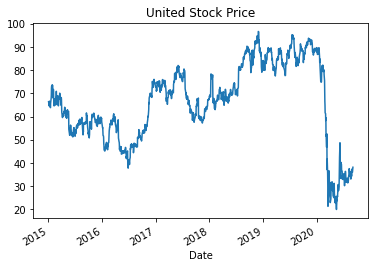

In [74]:
ual_close.plot()
plt.title("United Stock Price")

## Simple Moving Average (SMA)

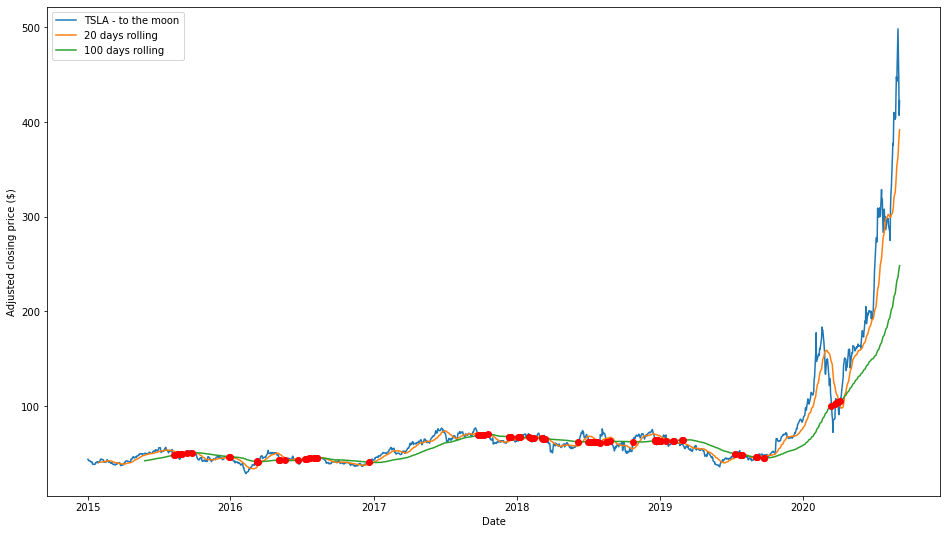

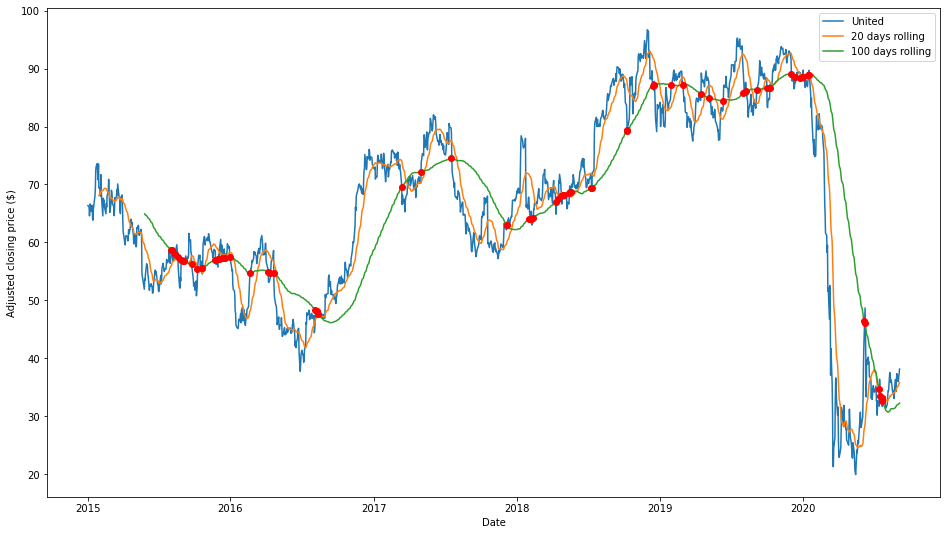

In [75]:
  def SMA(close, label_):
    
    # Calculate the 20 and 100 days moving averages of the closing prices
    short_rolling_close = close.rolling(window=20).mean()
    long_rolling_close = close.rolling(window=100).mean()

    # Plot the three lines
    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(close.index, close, label=label_)
    ax.plot(short_rolling_close.index, short_rolling_close, label='20 days rolling')
    ax.plot(long_rolling_close.index, long_rolling_close, label='100 days rolling')
    
    
    idx = np.argwhere(np.diff(np.sign(long_rolling_close - close))).flatten()
    plt.plot(long_rolling_close.index[idx], long_rolling_close[idx], 'ro')

    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted closing price ($)')
    ax.legend()
    
SMA(tsla_close,"TSLA - to the moon")

SMA(ual_close,"United")

## Exponential Moving Average (EMA)

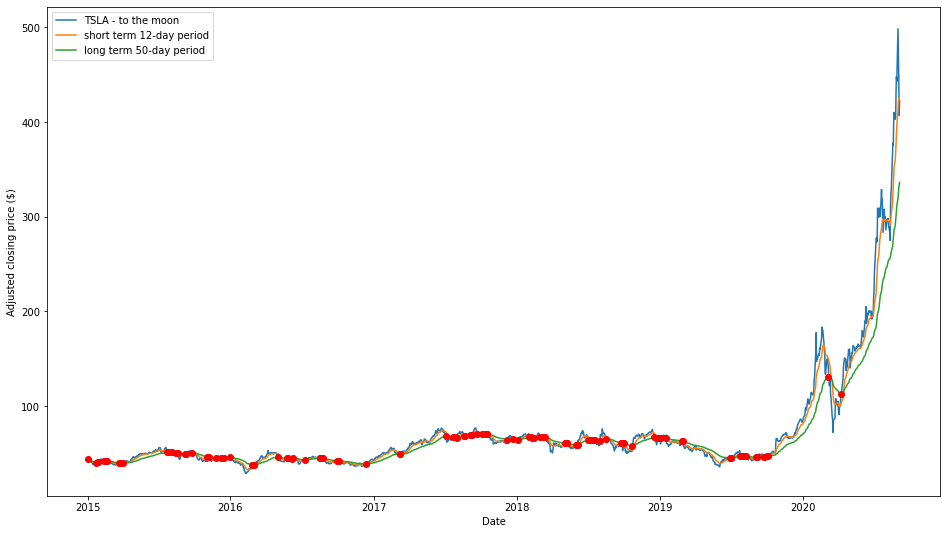

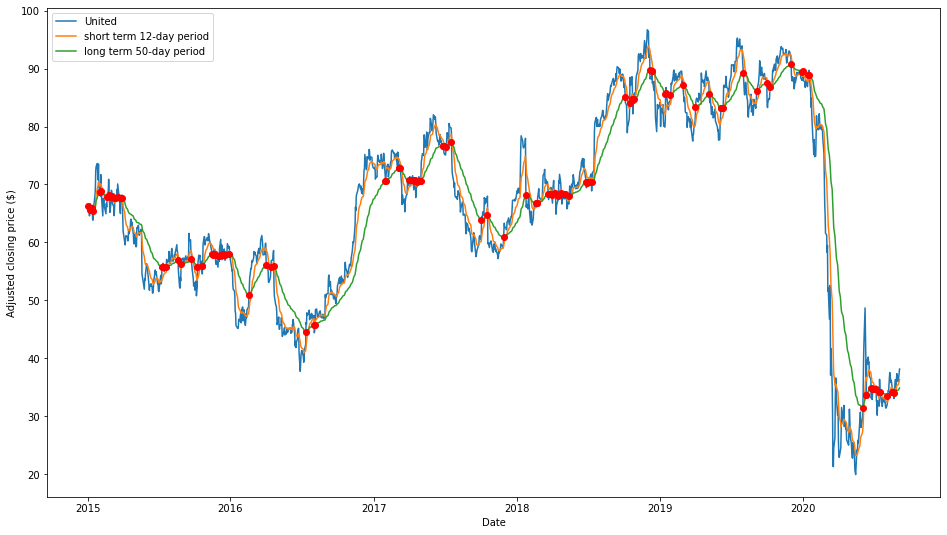

In [76]:
  def EMA(close, label_):
    
    # Calculate the 12 and 50 days exponential moving averages of the closing prices
    short_rolling_close = close.ewm(span = 12).mean()
    long_rolling_close = close.ewm(span = 50).mean()

    # Plot the three lines
    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(close.index, close, label=label_)
    ax.plot(short_rolling_close.index, short_rolling_close, label='short term 12-day period')
    ax.plot(long_rolling_close.index, long_rolling_close, label='long term 50-day period')
    
    idx = np.argwhere(np.diff(np.sign(long_rolling_close - close))).flatten()
    plt.plot(long_rolling_close.index[idx], long_rolling_close[idx], 'ro')

    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted closing price ($)')
    ax.legend()
    
EMA(tsla_close,"TSLA - to the moon")

EMA(ual_close,"United")

## GoogleTrends

In [77]:
tslaTrendData = pd.read_csv("tslaTrends.csv", parse_dates=True,index_col="Date")
tsla["Week"] = tsla.index.astype('datetime64[ns]').week
tsla['Year'] = tsla.index.astype('datetime64[ns]').year
meanTesla = tsla.groupby(['Year','Week']).mean()[["Close"]]
meanTesla

Close
Year Week            
2015 1      43.862000
     2      41.984000
     3      39.363599
     4      39.570500
     5      40.828001
...               ...
2020 32    295.972394
     33    304.777197
     34    386.122797
     35    425.714398
     36    450.032001

[297 rows x 1 columns]

In [78]:
tslaTrendData["Week"] = tslaTrendData.index.astype('datetime64[ns]').week
tslaTrendData["Year"] = tslaTrendData.index.astype('datetime64[ns]').year

combinedTslaData = pd.merge(tsla,tslaTrendData,how='inner')
combinedTslaData = combinedTslaData[["Week","Year","Popularity","Close"]]
combinedTslaData

,Week,Year,Popularity,Close
0,36,2019,8,45.001999
1,36,2019,8,44.136002
2,36,2019,8,45.916000
3,36,2019,8,45.490002
4,37,2019,7,46.358002
...,...,...,...,...
244,35,2020,100,402.839996
245,35,2020,100,404.667999
246,35,2020,100,430.634003
247,35,2020,100,447.750000


## Regression

In [79]:
import numpy as np

In [80]:
from sklearn.model_selection import train_test_split

def splitData(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    X_test  = X_test.values.reshape(-1, 1)
    y_test  = y_test.values.reshape(-1, 1)
    return (X_train, X_test, y_train, y_test)


Text(0.5, 0, 'Time (In Weeks)')

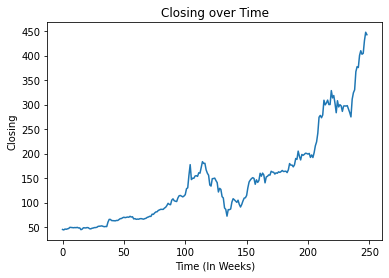

In [104]:
X = combinedTslaData["Popularity"]
y = combinedTslaData["Close"]

(X_train, X_test, y_train, y_test) = splitData(X, y)

plt.plot(y)
plt.title("Closing over Time")
plt.ylabel("Closing")
plt.xlabel("Time (In Weeks)")


Text(0.5, 0, 'Time (In Weeks)')

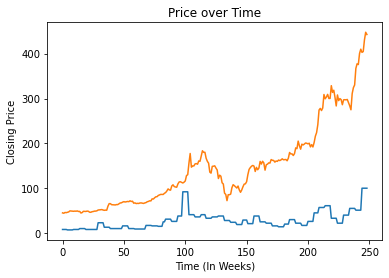

In [105]:
plt.plot(X)
plt.plot(y)
plt.title("Price over Time")
plt.ylabel("Closing Price")
plt.xlabel("Time (In Weeks)")

Text(0.5, 0, 'Popularity')

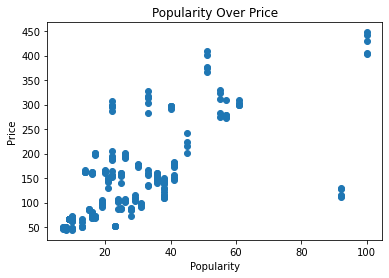

In [106]:
plt.scatter(X, y)
plt.title("Popularity Over Price")
plt.ylabel("Price")
plt.xlabel("Popularity")

## Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

# Create & train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Test linear model on testing(?) dataset
predictions = linear_model.predict(X_test)
len(predictions)

50

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', linear_model.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [[3.44127568]]
Mean squared error: 4999.06
Coefficient of determination: 0.40


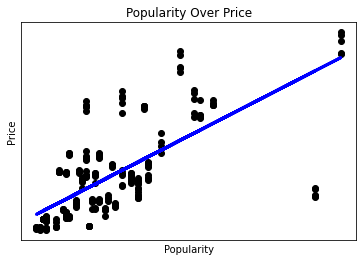

In [87]:
# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.title("Popularity Over Price")
plt.ylabel("Price")
plt.xlabel("Popularity")
plt.xticks(())
plt.yticks(())

plt.show()

## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=100000)

(closePrice_train, closePrice_test, popularity_train, popularity_test) = splitData(y, X)
# close price = ? * popularity + c
# look for ?
logistic_model.fit(closePrice_train, popularity_train) 

LogisticRegression(max_iter=100000)

In [94]:
predictions = logistic_model.predict( closePrice_test )
success = np.trace(conf_matrix)
total   = np.sum(conf_matrix)
predictions

array([ 22,  22,  10,  16,  16,  22,  22,  10,  51,  16,   8, 100,  22,
        10,  16,  38,  10,  16,   8,  22,  10,  16,  36,  10,  16,  61,
        16,  10,  36,  22,  16,  16,  57,  22,  38,  36,  16,  10,   8,
         8,  57,   8,   8,  36,  10,   8,  61,  57,  10,  16], dtype=int64)

In [101]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(popularity_test, predictions)
acc = np.trace(conf_matrix) / np.sum(conf_matrix)

print(acc)
print(conf_matrix)

0.3
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 

In [98]:

print(acc)

0.3
